In [249]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
from scipy.stats import randint

# to make this notebook's output identical at every run
np.random.seed(42)

# Working with data
import pandas as pd

# Plotting library
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

#Sk-Learn 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier


In [2]:
features=pd.read_csv('training_set_features.csv')
labels=pd.read_csv('training_set_labels.csv')

In [3]:
features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
features.shape

(26707, 36)

In [6]:
labels.shape

(26707, 3)

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   xyz_vaccine       26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [9]:
features.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [10]:
features.describe(include='object')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [11]:
features.isnull().sum(axis=0)

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

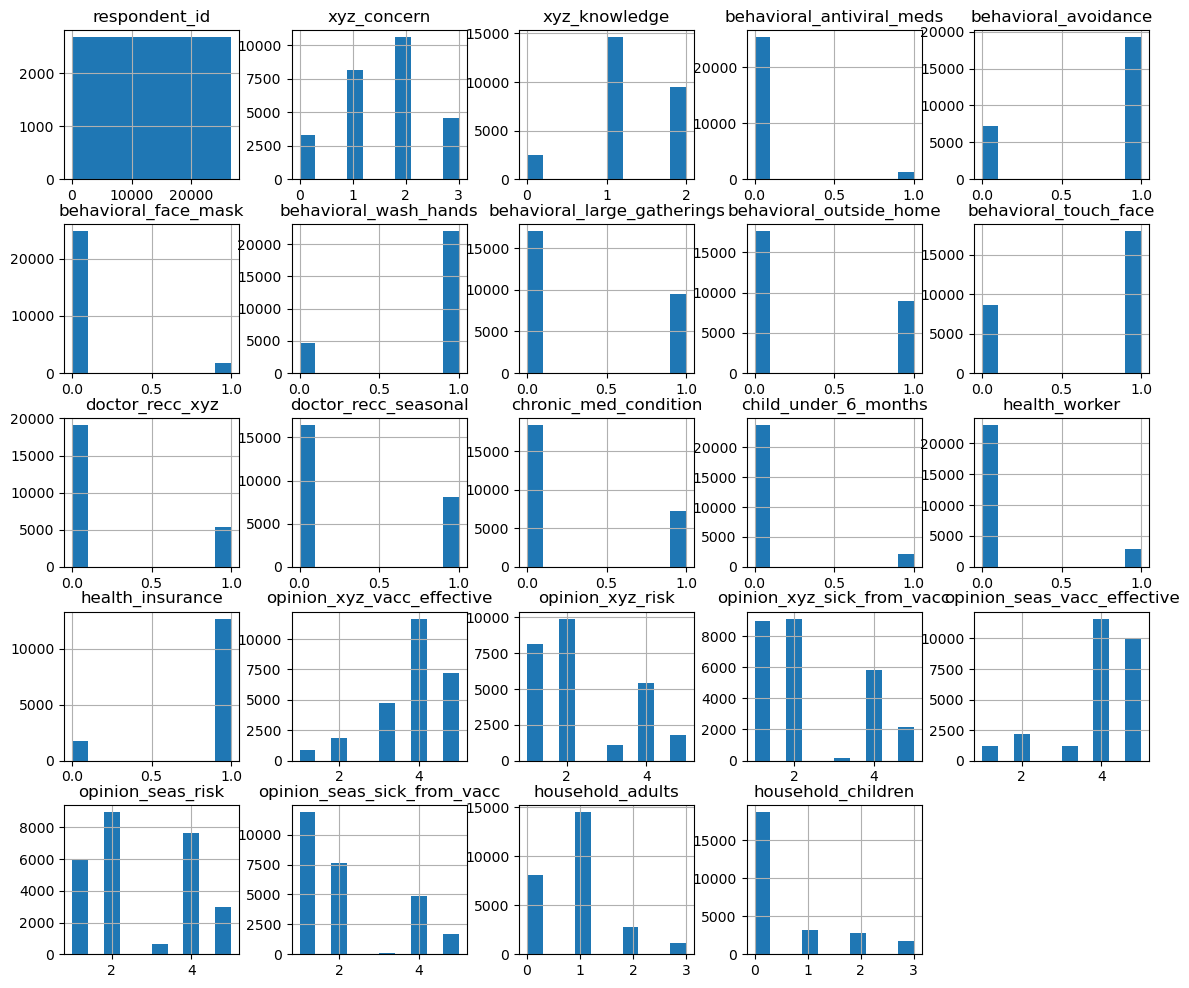

In [12]:
features.hist(bins=10, figsize=(14, 12))
plt.show()

In [13]:
features.duplicated().sum()

0

In [14]:
features['health_insurance'].fillna(value=0.0, inplace=True)

In [15]:
X=features.drop(['respondent_id', 'employment_industry', 'employment_occupation'], axis=1)
y1=labels['xyz_vaccine']
y2=labels['seasonal_vaccine']

In [16]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test=train_test_split(X, y2, test_size=0.2, random_state=42)

In [17]:
col_names=X1_train.columns

In [18]:
X1_train.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
24706,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Married,Rent,Unemployed,lzgpxyit,"MSA, Not Principle City",1.0,0.0
5393,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,White,Male,"> $75,000",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0
20898,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,White,Male,NaN,Married,NaN,Employed,qufhixun,"MSA, Not Principle City",1.0,1.0
3429,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Other or Multiple,Female,NaN,Not Married,Own,Employed,bhuqouqj,Non-MSA,0.0,0.0
8731,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,1.0


In [19]:
X1_train.shape

(21365, 33)

In [20]:
y1_train.head()

24706    0
5393     0
20898    1
3429     0
8731     0
Name: xyz_vaccine, dtype: int64

In [21]:
X2_test

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
15772,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,White,Female,NaN,NaN,NaN,NaN,atmpeygn,"MSA, Principle City",NaN,NaN
9407,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,...,White,Male,NaN,NaN,NaN,NaN,fpwskwrf,"MSA, Principle City",1.0,1.0
16515,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,White,Female,NaN,Not Married,Own,Employed,atmpeygn,"MSA, Not Principle City",0.0,1.0
23353,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,bhuqouqj,Non-MSA,1.0,2.0
10008,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25132,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,oxchjgsf,"MSA, Not Principle City",1.0,2.0
20086,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,oxchjgsf,"MSA, Not Principle City",0.0,0.0
5045,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,Non-MSA,1.0,3.0
6340,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Principle City",1.0,3.0


In [22]:
y2_test

15772    0
9407     1
16515    0
23353    0
10008    0
        ..
25132    1
20086    0
5045     0
6340     0
12943    1
Name: seasonal_vaccine, Length: 5342, dtype: int64

In [23]:
data=X1_test.copy()

In [24]:
numeric=data.select_dtypes(exclude='object')
corr_matrix=numeric.corr()

In [25]:
corr_matrix['chronic_med_condition'].sort_values(ascending=False)

chronic_med_condition          1.000000
doctor_recc_seasonal           0.205412
opinion_seas_risk              0.158116
doctor_recc_xyz                0.151207
opinion_xyz_risk               0.124314
behavioral_outside_home        0.115784
opinion_seas_vacc_effective    0.100017
xyz_concern                    0.099533
behavioral_large_gatherings    0.099121
health_insurance               0.063440
opinion_xyz_sick_from_vacc     0.062617
opinion_xyz_vacc_effective     0.049524
opinion_seas_sick_from_vacc    0.046947
behavioral_avoidance           0.044746
behavioral_wash_hands          0.042556
behavioral_face_mask           0.041385
behavioral_touch_face          0.035504
behavioral_antiviral_meds      0.011570
child_under_6_months           0.000837
xyz_knowledge                 -0.023998
health_worker                 -0.028680
household_adults              -0.087649
household_children            -0.102317
Name: chronic_med_condition, dtype: float64

Some of the relations(Positive) which we can use later to impute the missing values in the data using them:
1. opinion_xyz_risk(Respondent's opinion about risk of getting sick with xyz flu without vaccine) & opinion_seas_risk(Respondent's opinion about risk of getting sick with 
seasonal flu without vaccin)
2. opinion_xyz_vacc_effective(Respondent's opinion about xyz vaccine 
effectivenes) & opinion_seas_vacc_effective(Respondent's opinion about seasonal flu 
vaccine effectivenes)
3. doctor_recc_xyz(xyz flu vaccine was recommended by doctor) & doctor_recc_seasonal(Seasonal flu vaccine was recommended by doctor)
4. behavioral_outside_home(Has reduced contact with people outside of own
househol) & behavioral_large_gatherings(Has reduced time at large gatherings)
5. opinion_xyz_sick_from_vacc(Respondent's worry of getting sick from 
taking xyz vaccin) & opinion_seas_sick_from_vacc(Respondent's worry of getting sick from 
taking seasonal flu vaccin)eedsse

<Axes: >

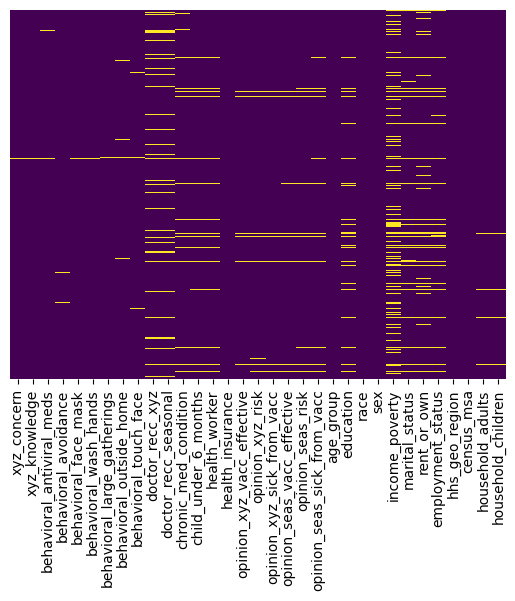

In [26]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='health_worker', ylabel='count'>

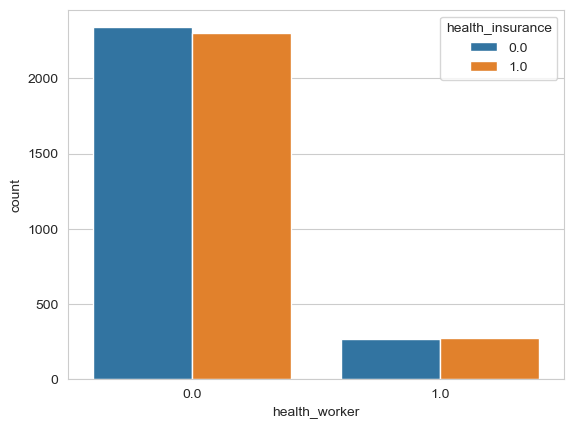

In [27]:
sns.set_style('whitegrid')
temp = data['health_insurance'].astype(str)
sns.countplot(x='health_worker', hue=temp, data=data)

In [28]:
impute_most_freq = data.drop(['health_insurance'], axis=1).columns
health_insurance=['health_insurance']

In [29]:
impute_missing = ColumnTransformer([
                                    ('imp_mf', SimpleImputer(strategy='most_frequent'), impute_most_freq),
                                    ('imp_hi', SimpleImputer(strategy='constant', fill_value=0.0), health_insurance)
], remainder='passthrough')

In [30]:
filled_data=data.copy()
filled_data=impute_missing.fit_transform(filled_data)
filled_data

array([[2.0, 1.0, 0.0, ..., 1.0, 0.0, 0.0],
       [3.0, 0.0, 0.0, ..., 1.0, 1.0, 0.0],
       [1.0, 1.0, 0.0, ..., 0.0, 1.0, 1.0],
       ...,
       [2.0, 2.0, 0.0, ..., 1.0, 3.0, 1.0],
       [3.0, 0.0, 0.0, ..., 1.0, 3.0, 0.0],
       [3.0, 1.0, 0.0, ..., 1.0, 0.0, 0.0]], dtype=object)

In [31]:
df=pd.DataFrame(filled_data, columns=col_names)
df.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",1.0,0.0,0.0
1,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,fpwskwrf,"MSA, Principle City",1.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,atmpeygn,"MSA, Not Principle City",0.0,1.0,1.0
3,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Female,"> $75,000",Married,Own,Employed,bhuqouqj,Non-MSA,1.0,2.0,1.0
4,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Male,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Principle City",1.0,0.0,0.0


<Axes: >

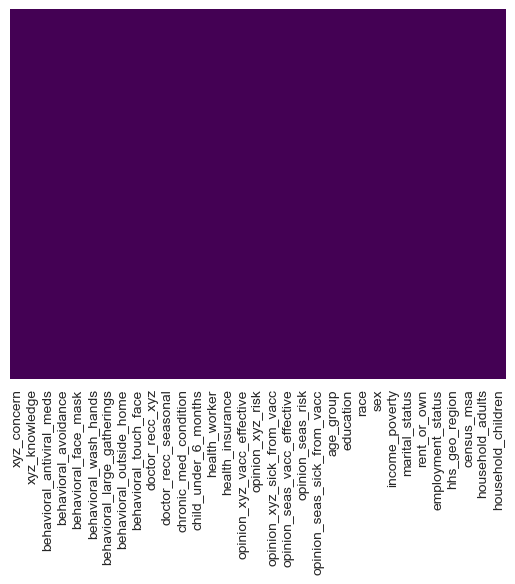

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
data=X1_train.copy()

In [34]:
object_cols=data.select_dtypes(include='object').columns
object_cols

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [35]:
data[object_cols].nunique()

age_group             5
education             4
race                  4
sex                   2
income_poverty        3
marital_status        2
rent_or_own           2
employment_status     3
hhs_geo_region       10
census_msa            3
dtype: int64

In [36]:
num_cols=data.select_dtypes(exclude='object').columns
num_cols

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [37]:
encoding = ColumnTransformer([
                            ('hot', OneHotEncoder(handle_unknown='ignore'), object_cols), 
                            ('scaler', StandardScaler(), num_cols)
], remainder='passthrough')

In [38]:
encoded_data=data.copy()
encoded_data=encoding.fit_transform(encoded_data)
encoded_data

array([[ 0.        ,  0.        ,  1.        , ..., -0.09084121,
         0.14724674, -0.57654492],
       [ 0.        ,  0.        ,  1.        , ...,  1.40712641,
        -1.17822448, -0.57654492],
       [ 0.        ,  1.        ,  0.        , ..., -0.83982502,
         0.14724674,  0.49932318],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.09084121,
         0.14724674, -0.57654492],
       [ 0.        ,  1.        ,  0.        , ...,  1.40712641,
         0.14724674, -0.57654492],
       [ 1.        ,  0.        ,  0.        , ..., -0.09084121,
        -1.17822448, -0.57654492]])

In [39]:
df=pd.DataFrame(encoded_data)

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.35842,-0.948660,1.140877,1.284536,-0.265025,-0.027288,0.922229,-0.090841,0.147247,-0.576545
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.35842,-0.948660,1.140877,1.284536,1.202464,0.896710,0.922229,1.407126,-1.178224,-0.576545
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.35842,1.054119,-2.823631,-0.268458,-0.998770,-2.799282,0.922229,-0.839825,0.147247,0.499323
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.35842,1.054119,0.149750,-0.268458,-0.998770,-0.027288,-0.521035,-0.090841,-1.178224,-0.576545
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.35842,1.054119,-0.841377,-0.268458,1.936208,0.896710,-0.521035,2.156110,0.147247,0.499323


In [41]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('hot', OneHotEncoder(handle_unknown='ignore'))
])
continuous_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaling', StandardScaler())
])

In [42]:
preprocessor = ColumnTransformer(transformers=[
    ('num', continuous_pipeline, num_cols),
    ('cat', categorical_pipeline, object_cols)
], remainder='passthrough')

In [43]:
data=X1_train.copy()

In [44]:
scaled_data=preprocessor.fit_transform(data)

In [45]:
scaled_data.shape

(21365, 61)

<Axes: >

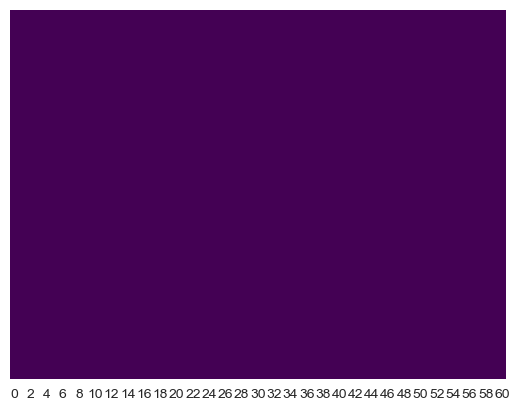

In [46]:
df=pd.DataFrame(scaled_data)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [82]:
sgd_clf = SGDClassifier(max_iter=500, random_state=42)
sgd_clf_model = make_pipeline(preprocessor, sgd_clf)
sgd_clf_model.fit(X1_train, y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_larg...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('sgdclassifier',
                 SGDClassifier(max_iter=500, random_state=42))])

In [96]:
sgd_clf_model.score(X1_train, y1_train)

0.8439971916686169

In [83]:
sgd_clf_model.score(X1_test, y1_test)

0.8406963684013478

In [85]:
cross_val_score(sgd_clf_model, X1_train, y1_train, cv=5, scoring="accuracy")

array([0.84062719, 0.84132928, 0.84647788, 0.83852095, 0.84132928])

In [86]:
y1_pred = cross_val_predict(sgd_clf_model, X1_train, y1_train, cv=3)

In [87]:
confusion_matrix(y1_train, y1_pred)

array([[15959,   862],
       [ 2600,  1944]], dtype=int64)

In [88]:
precision_score(y1_train, y1_pred)

0.6928011404133999

In [89]:
recall_score(y1_train, y1_pred)

0.4278169014084507

In [90]:
f1_score(y1_train, y1_pred)

0.5289795918367347

In [91]:
y1_scores = cross_val_predict(sgd_clf_model, X1_train, y1_train, cv=3,
                             method="decision_function")

In [121]:
y1_scores.shape

(21365,)

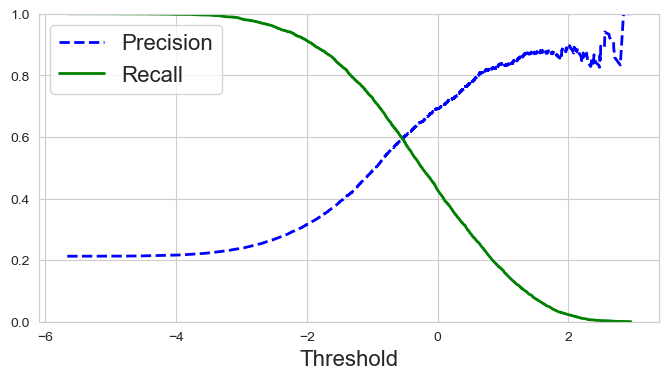

In [92]:
precisions, recalls, thresholds = precision_recall_curve(y1_train, y1_scores)
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.ylim([0, 1])
plt.show()

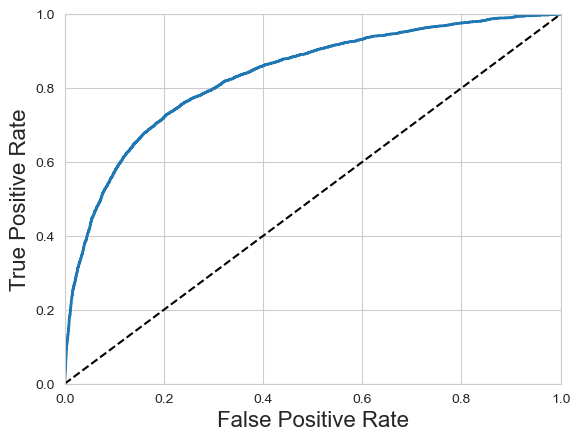

<Figure size 800x600 with 0 Axes>

In [93]:
fpr, tpr, thresholds = roc_curve(y1_train, y1_scores)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plt.show()

In [94]:
roc_auc_score(y1_train, y1_scores)

0.8332091487752985

In [65]:
svc = SVC()
svc_model = make_pipeline(preprocessor, svc)
svc_model.fit(X1_train, y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_larg...
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('svc', SVC())])

In [67]:
svc_model.score(X1_train, y1_train)

0.6595834308448397

In [68]:
svc_model.score(X1_test, y1_test)

0.6458255335080494

In [145]:
rand = RandomForestClassifier(random_state=42)
rand_model = make_pipeline(preprocessor, rand)
rand_model.fit(X1_train, y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_larg...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [146]:
rand_model.score(X1_train, y1_train)

1.0

In [147]:
rand_model.score(X1_test, y1_test)

0.8489329839011606

In [148]:
y1_pred=rand_model.predict(X1_test)

In [149]:
confusion_matrix(y1_test, y1_pred)

array([[4066,  146],
       [ 661,  469]], dtype=int64)

In [150]:
y1_pred_prob = rand_model.predict_proba(X1_test)

In [151]:
y1_pred_prob=y1_pred_prob[:, 1]

In [152]:
roc_auc_score(y1_test, y1_pred_prob)

0.8567498886451688

In [153]:
cross_val_score(rand_model, X1_train, y1_train, cv=3, scoring="accuracy")

array([0.84863802, 0.84765515, 0.84959978])

In [170]:
# Hyperparameters
parameters = {
                'classifier__n_estimators': [30, 50, 100],
                'classifier__criterion' : ['gini', 'entropy', 'log_loss']
                }
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
grid_search = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_...
                                                                         Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
grid_search.best_params_

{'classifier__criterion': 'entropy', 'classifier__n_estimators': 100}

In [172]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.813812,0.096780,0.047575,0.011403,gini,30,"{'classifier__criterion': 'gini', 'classifier_...",-0.161713,-0.157267,-0.151182,...,-0.156424,0.003429,9,-0.001755,-0.002048,-0.001872,-0.002691,-0.001814,-0.002036,0.000342
1,1.114557,0.016704,0.061081,0.003101,gini,50,"{'classifier__criterion': 'gini', 'classifier_...",-0.160309,-0.154692,-0.149310,...,-0.153990,0.003635,6,-0.000293,-0.000585,-0.000293,-0.000527,-0.000644,-0.000468,0.000148
2,2.216282,0.099617,0.111136,0.012493,gini,100,"{'classifier__criterion': 'gini', 'classifier_...",-0.156096,-0.152820,-0.148139,...,-0.152914,0.002638,5,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3,0.769951,0.050578,0.046957,0.000187,entropy,30,"{'classifier__criterion': 'entropy', 'classifi...",-0.159841,-0.156564,-0.148608,...,-0.155067,0.003729,7,-0.001638,-0.002516,-0.001755,-0.002106,-0.002048,-0.002013,0.000306
4,1.208249,0.060919,0.068624,0.006623,entropy,50,"{'classifier__criterion': 'entropy', 'classifi...",-0.156330,-0.155628,-0.146501,...,-0.152726,0.003666,3,-0.000351,-0.000936,-0.000468,-0.000468,-0.000527,-0.000550,0.000201
5,2.315640,0.087751,0.110107,0.010529,entropy,100,"{'classifier__criterion': 'entropy', 'classifi...",-0.155862,-0.148139,-0.145331,...,-0.150667,0.003636,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
6,0.750544,0.009953,0.047512,0.000792,log_loss,30,"{'classifier__criterion': 'log_loss', 'classif...",-0.159841,-0.156564,-0.148608,...,-0.155067,0.003729,7,-0.001638,-0.002516,-0.001755,-0.002106,-0.002048,-0.002013,0.000306
7,1.199173,0.044910,0.062614,0.000255,log_loss,50,"{'classifier__criterion': 'log_loss', 'classif...",-0.156330,-0.155628,-0.146501,...,-0.152726,0.003666,3,-0.000351,-0.000936,-0.000468,-0.000468,-0.000527,-0.000550,0.000201
8,2.442365,0.178945,0.120297,0.014854,log_loss,100,"{'classifier__criterion': 'log_loss', 'classif...",-0.155862,-0.148139,-0.145331,...,-0.150667,0.003636,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [217]:
param_distribs = {
        'classifier__n_estimators': randint(low=200, high=300),
        'classifier__criterion' : ['gini']
    }
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rnd_search = RandomizedSearchCV(pipeline, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X1_train, y1_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('scaling',
                                                                                                StandardScaler())]),
                                                                               Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral...
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'classifier__criterion': ['gini'],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FAEF51F950>},
                   random_state=42, scoring='neg_mean_squared_error')

In [218]:
rnd_search.best_params_

{'classifier__criterion': 'gini', 'classifier__n_estimators': 271}

In [219]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.131255,1.020942,0.379356,0.052449,gini,302,"{'classifier__criterion': 'gini', 'classifier_...",-0.153990,-0.151416,-0.142757,-0.152118,-0.151884,-0.150433,0.003937,5
1,11.885200,0.816078,0.559185,0.062684,gini,470,"{'classifier__criterion': 'gini', 'classifier_...",-0.155628,-0.153288,-0.144395,-0.150480,-0.151650,-0.151088,0.003767,8
2,7.651396,0.199483,0.342216,0.004059,gini,306,"{'classifier__criterion': 'gini', 'classifier_...",-0.153288,-0.151884,-0.143225,-0.151182,-0.152118,-0.150339,0.003621,4
3,6.425775,0.397833,0.300938,0.019426,gini,271,"{'classifier__criterion': 'gini', 'classifier_...",-0.153288,-0.151182,-0.143693,-0.150948,-0.151884,-0.150199,0.003354,1
4,8.321045,0.045501,0.401296,0.035931,gini,388,"{'classifier__criterion': 'gini', 'classifier_...",-0.156096,-0.152820,-0.143225,-0.150714,-0.152118,-0.150995,0.004268,7
5,4.630394,0.157125,0.224196,0.008591,gini,220,"{'classifier__criterion': 'gini', 'classifier_...",-0.153990,-0.151182,-0.144863,-0.152352,-0.153522,-0.151182,0.003306,10
6,6.335485,0.131772,0.307040,0.010493,gini,302,"{'classifier__criterion': 'gini', 'classifier_...",-0.153990,-0.151416,-0.142757,-0.152118,-0.151884,-0.150433,0.003937,5
7,6.954075,0.326489,0.339678,0.045031,gini,321,"{'classifier__criterion': 'gini', 'classifier_...",-0.153990,-0.151884,-0.142991,-0.150948,-0.151416,-0.150246,0.003774,3
8,8.719840,0.163754,0.411806,0.004174,gini,414,"{'classifier__criterion': 'gini', 'classifier_...",-0.155862,-0.152820,-0.143927,-0.150246,-0.152820,-0.151135,0.004019,9
9,6.553952,0.793506,0.306022,0.036780,gini,287,"{'classifier__criterion': 'gini', 'classifier_...",-0.153288,-0.151416,-0.143459,-0.150948,-0.151884,-0.150199,0.003460,1


In [211]:
tuned_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='gini', n_estimators=288))
])

In [212]:
tuned_pipeline.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gat...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=288, random_state=42))])

In [213]:
tuned_pipeline.score(X1_train, y1_train)

1.0

In [214]:
tuned_pipeline.score(X1_test, y1_test)

0.8502433545488581

In [215]:
y1_pred=tuned_pipeline.predict(X1_test)

In [216]:
confusion_matrix(y1_test, y1_pred)

array([[4071,  141],
       [ 659,  471]], dtype=int64)

In [220]:
y1_pred_prob = tuned_pipeline.predict_proba(X1_test)

In [221]:
y1_pred_prob=y1_pred_prob[:, 1]

In [222]:
roc_auc_score(y1_test, y1_pred_prob)

0.8598346275706158

In [224]:
tuned_pipeline.fit(X2_train, y2_train)
tuned_pipeline.score(X2_test, y2_test)

0.7834144515162861

In [228]:
# Hyperparameters
parameters = {
                'classifier__n_estimators': [200, 250, 200],
                'classifier__criterion' : ['gini', 'entropy', 'log_loss']
                }
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
grid_search = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_...
                                                                         Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__n_estimators': [200, 250, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [229]:
grid_search.best_params_

{'classifier__criterion': 'entropy', 'classifier__n_estimators': 250}

In [230]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.436579,0.592467,0.199751,0.021511,gini,200,"{'classifier__criterion': 'gini', 'classifier_...",-0.218816,-0.238708,-0.226071,...,-0.226398,0.007188,8,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
1,6.467443,0.306489,0.291807,0.005532,gini,250,"{'classifier__criterion': 'gini', 'classifier_...",-0.218114,-0.234964,-0.223730,...,-0.225556,0.006013,3,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
2,5.101616,0.169157,0.242874,0.022247,gini,200,"{'classifier__criterion': 'gini', 'classifier_...",-0.218816,-0.238708,-0.226071,...,-0.226398,0.007188,8,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
3,5.715179,0.611073,0.244744,0.013260,entropy,200,"{'classifier__criterion': 'entropy', 'classifi...",-0.219284,-0.237070,-0.221624,...,-0.226258,0.006280,4,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
4,6.824401,0.195291,0.298433,0.006201,entropy,250,"{'classifier__criterion': 'entropy', 'classifi...",-0.217412,-0.236368,-0.220454,...,-0.225135,0.006804,1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
5,5.857104,0.464767,0.270857,0.024715,entropy,200,"{'classifier__criterion': 'entropy', 'classifi...",-0.219284,-0.237070,-0.221624,...,-0.226258,0.006280,4,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
6,6.261955,0.402810,0.262055,0.025158,log_loss,200,"{'classifier__criterion': 'log_loss', 'classif...",-0.219284,-0.237070,-0.221624,...,-0.226258,0.006280,4,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
7,7.682613,0.124028,0.318914,0.029143,log_loss,250,"{'classifier__criterion': 'log_loss', 'classif...",-0.217412,-0.236368,-0.220454,...,-0.225135,0.006804,1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
8,5.957953,0.163875,0.274816,0.031983,log_loss,200,"{'classifier__criterion': 'log_loss', 'classif...",-0.219284,-0.237070,-0.221624,...,-0.226258,0.006280,4,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0


In [231]:
param_distribs = {
        'classifier__n_estimators': randint(low=200, high=300),
        'classifier__criterion' : ['gini']
    }
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rnd_search = RandomizedSearchCV(pipeline, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X2_train, y2_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('scaling',
                                                                                                StandardScaler())]),
                                                                               Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral...
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'classifier__criterion': ['gini'],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FAEAABAAD0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [232]:
rnd_search.best_params_

{'classifier__criterion': 'gini', 'classifier__n_estimators': 274}

In [233]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.669365,0.946802,0.312419,0.034873,gini,251,"{'classifier__criterion': 'gini', 'classifier_...",-0.218582,-0.236602,-0.223730,-0.229815,-0.222560,-0.226258,0.006303,5
1,7.887533,0.179268,0.353064,0.003925,gini,292,"{'classifier__criterion': 'gini', 'classifier_...",-0.218582,-0.236368,-0.225837,-0.227709,-0.221390,-0.225977,0.006111,4
2,5.882488,0.205420,0.268693,0.006613,gini,214,"{'classifier__criterion': 'gini', 'classifier_...",-0.219752,-0.237538,-0.226305,-0.227943,-0.220220,-0.226352,0.006463,6
3,7.554535,0.281592,0.333468,0.007017,gini,271,"{'classifier__criterion': 'gini', 'classifier_...",-0.219752,-0.234496,-0.224901,-0.230283,-0.223028,-0.226492,0.005261,8
4,7.180875,0.221935,0.324712,0.004291,gini,260,"{'classifier__criterion': 'gini', 'classifier_...",-0.219518,-0.235900,-0.225369,-0.229581,-0.222560,-0.226586,0.005716,9
5,6.168138,0.202545,0.287364,0.006217,gini,220,"{'classifier__criterion': 'gini', 'classifier_...",-0.219284,-0.237304,-0.223964,-0.227475,-0.221858,-0.225977,0.006267,3
6,7.932330,0.280192,0.348015,0.003714,gini,282,"{'classifier__criterion': 'gini', 'classifier_...",-0.220688,-0.237304,-0.224432,-0.228177,-0.221624,-0.226445,0.006022,7
7,9.879832,1.216587,0.423984,0.060836,gini,286,"{'classifier__criterion': 'gini', 'classifier_...",-0.220220,-0.237070,-0.225837,-0.227709,-0.222092,-0.226586,0.005873,9
8,8.301811,0.469599,0.362383,0.002921,gini,274,"{'classifier__criterion': 'gini', 'classifier_...",-0.219050,-0.235432,-0.224198,-0.228411,-0.221390,-0.225696,0.005781,1
9,8.266653,0.745888,0.368870,0.025579,gini,274,"{'classifier__criterion': 'gini', 'classifier_...",-0.219050,-0.235432,-0.224198,-0.228411,-0.221390,-0.225696,0.005781,1


In [310]:
tuned_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='gini', n_estimators=274))
])

In [311]:
tuned_pipeline2.fit(X2_train, y2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gat...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=274, random_state=42))])

In [312]:
tuned_pipeline2.score(X2_train, y2_train)

1.0

In [313]:
tuned_pipeline2.score(X2_test, y2_test)

0.7824784724822164

In [314]:
y2_pred_prob = tuned_pipeline.predict_proba(X2_test)
y2_pred_prob=y2_pred_prob[:, 1]

In [315]:
roc_auc_score(y2_test, y2_pred_prob)

0.8527833181692901

In [276]:
# X_train, X_test, y_train, y_test =train_test_split(X, labels, test_size=0.2, random_state=42)

In [277]:
# knn_clf = KNeighborsClassifier()
# knn_clf_model=make_pipeline(preprocessor, knn_clf)
# multi = MultiOutputClassifier(knn_clf_model, n_jobs=-1)
# knn_clf_model.fit(X_train, y_train)

In [278]:
# y_train_pred = cross_val_predict(multi, X_train, y_train, cv=3, n_jobs=-1)
# y_train_pred = multi.predict(X_train)

In [279]:
# from sklearn.metrics import classification_report
# knn_clf_model.score(X_train, y_train)
# multi.score(X_test, y_test)

In [280]:
# round(f1_score(y_train, y_train_pred), 2)

In [281]:
# f1_score(y_train, y_train_pred, average="macro")

In [282]:
FINAL_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='gini', n_estimators=288))
])

In [284]:
FINAL_pipeline.fit(X, y1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gat...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=288, random_state=42))])

In [285]:
FINAL_pipeline.score(X, y1)

1.0

In [323]:
submission = pd.read_csv('test_set_features.csv')

In [324]:
submission.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [325]:
id=submission['respondent_id']

In [326]:
submission.drop(['respondent_id', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)

In [327]:
y_proba_first = FINAL_pipeline.predict_proba(submission)

In [328]:
y_proba_first

array([[0.82638889, 0.17361111],
       [0.98263889, 0.01736111],
       [0.65625   , 0.34375   ],
       ...,
       [0.86458333, 0.13541667],
       [0.95486111, 0.04513889],
       [0.54861111, 0.45138889]])

In [329]:
y_proba_first=y_proba_first[:, 1]

In [330]:
FINAL_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, criterion='gini', n_estimators=274))
])

In [331]:
FINAL_pipeline2.fit(X, y2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gat...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=274, random_state=42))])

In [332]:
FINAL_pipeline2.score(X, y2)

1.0

In [333]:
y_proba_second = FINAL_pipeline2.predict_proba(submission)

In [334]:
y_proba_second=y_proba_second[:, 1]

In [338]:
first=pd.DataFrame(y_proba_first, columns=['h1n1_vaccine'])
first.head()

,h1n1_vaccine
0,0.173611
1,0.017361
2,0.343750
3,0.621528
4,0.343750


In [341]:
second=pd.DataFrame(y_proba_second, columns=['seasonal_vaccine'])
second.head()

,seasonal_vaccine
0,0.354015
1,0.032847
2,0.795620
3,0.875912
4,0.503650


In [343]:
submit=pd.concat([id, first, second], axis=1)

In [344]:
submit.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.173611,0.354015
1,26708,0.017361,0.032847
2,26709,0.343750,0.795620
3,26710,0.621528,0.875912
4,26711,0.343750,0.503650


In [346]:
submit.shape

(26708, 3)

In [348]:
submit.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26703,53410,0.260417,0.481752
26704,53411,0.125000,0.259124
26705,53412,0.135417,0.364964
26706,53413,0.045139,0.408759
26707,53414,0.451389,0.583942


In [349]:
submit.to_csv('Sneha_Kanodia_Datahack.csv', index=False)